# Markov chains

#### Josep Fortiana 2018-11-21

## Two-state Markov chain: daily rainfall in Tel-Aviv

#### Model

Occurrence of wet and dry days during the rainy period: December, January, February. Probability $\alpha$ of a wet day following a dry day is 0.250. Probability $\beta$ of a dry day following a wet day is 0.338.

From the classical article: Gabriel, K. Reuben and Neumann, J. (1962), _A Markov chain model for daily rainfall occurrence at Tel Aviv,_ Quarterly Journal of the Royal Meteorological Society 88(375):90-95.

#### Data

In [1]:
# Matrix of observed data
X<-matrix(c(1049,351,350,687),nrow=2)
rownames(X)<-c("Dry","Wet")
colnames(X)<-c("Dry","Wet")
names(dimnames(X))<-c("Preceding","Actual")
X

,Dry,Wet
Dry,1049,350
Wet,351,687


#### Transition probabilities

In [2]:
# Divide each row by its total, to give an estimate of transition probabilities
# Row totals
X.rt<-apply(X,1,sum)
t(X.rt)
# Divide each row by its total to give an etimate of the transition matrix 
P<-diag(1/X.rt)%*%X 
rownames(P)<-c("Dry","Wet")   # Names MIA
round(P,3)
alpha<-P[1,2]
beta<-P[2,1]
round(alpha,3)
round(beta,3)

Dry,Wet
1399,1038


,Dry,Wet
Dry,0.750,0.250
Wet,0.338,0.662


[1] 0.25

[1] 0.338

#### Assuming today is a dry day

In [3]:
p0<-c(1,0)        # State as of today
p1<-p0%*%P        # Probabilities for tomorrow
round(as.numeric(p1),3)
p2<-p1%*%P        # Probabilities for the day after tomorrow
round(as.numeric(p2),3)
p<-p2

[1] 0.75 0.25

[1] 0.647 0.353

#### And so on $\dots$ until stabilization

In [4]:
p<-p%*%P
round(as.numeric(p),3)    # Execute this cell several times

[1] 0.604 0.396

#### Using the eigenvalue decomposition

In [5]:
eP<-eigen(P)
round(eP$values,3) # First, larger eigenvalue is equal to 1 ()
D<-diag(eP$values)
U<-eP$vectors
round(U,3)
U1<-solve(U)      # Inverse matrix
round(U1,3)
#~ p.inf<-U1[1,]1,1/sum(U1[1,]))

[1] 1.000 0.412

0.707,-0.595
0.707,0.804


0.813,0.601
-0.715,0.715


#### Exercise 

Check that product of the result of the eigendecomposition is equal to $P$. In which order?

In [ ]:
#
# Insert here your code
#

#### Extracting the stable probability vector

The stable vector is the first row of the matrix of left eigenvectors of $P$, the inverse matrix of $U$, the matrix of right eigenvectors of $P$, normalized to sum 1.

In [8]:
v<-U1[1,]
p.inf<-v/sum(v)
round(p.inf,3)

[1] 0.575 0.425

## Weather in the Land of Oz

According to Kemeny, Snell, and Thompson (J. G. Kemeny, J. L. Snell, G. L. Thompson, _Introduction to Finite Mathematics, 3rd ed.,_	Englewood Cliffs, NJ: Prentice-Hall, 1974), the Land of Oz is blessed by many things, but not by good weather. 

They never have two nice days in a row. If they have a nice day, they are just as likely to have snow as rain the next day. If they have snow or rain, they have an even chance of having the same the next day. If there is change from snow or rain, only half of the time is this a change to a nice day. 

With this information we can write a Markov chain model for this peculiar weather. We take as states: $R$ (rainy), $N$ (nice), and $S$ (snowy).

#### Exercise

From this information verify that the matrix $\mathbf{P}$ below is indeed the transition matrix of this model:

$$
	\begin{array}{cc|ccc}
				&	&R 	&	N& S  \\
				\hline
				&R 	&1/2& 1/4& 1/4 \\
			&N 	&1/2&  0 & 1/2 \\
				&S 	&1/4& 1/4& 1/2
	\end{array}
$$

#### Exercise

Compute the first 6 powers $\mathbf{P}^{j}$, $1\leq j\leq 6$, of the transition matrix, and use them to obtain the probabilities of each weather state on day  $j$, provided we know the weather today (day 0).

In [7]:
#
# Insert here your code
#

Uncomment the code below, to check whether this chain has a stationary probability distribution and, if so, obtain it.

In [8]:
#eP<-eigen(P)
#U<-eP$vectors
#U1<-solve(U)      # Inverse matrix
#v<-U1[1,]
#p.inf<-v/sum(v)
#round(p.inf,3)
#
# Result should be:
# (0.4, 0.2, 0.4)

## Ehrenfest model

#### Exercise

Write a function returning the transition matrix for the Ehrenfest model for each $n$.

In [9]:
#
# Insert here your code
#

#### Exercise

Compute the stationary distribution of the Ehrenfest model for $n=2,3,4,5$.

In [10]:
#
# Insert here your code
#

## Drunkard's walk

There is a sequence of $2n + 1$ pubs on a street. A drunkard starts at the middle house. At every time step, if he is at pub number $i$, then with probability $1/2$ he goes to pub number $i-1$ and with probability $1/2$ to pub $i+1$.

#### Exercise

Check that this description can be fitted with a Markov chain model, and write its transition matrix (as a function of $n$).
_Remark:_ The above description does not determine completely the transition matrix, as behavior at both extreme points is not specified. There are two reasonable possibilities: either go to the (only) next pub with probability 1, as in the Ehrenfest model, or stay forever at the reached extreme. In the latter case such states are called _absorbent._

In [11]:
#
# Insert here your code
#
# The first version has "bouncing" (reflecting) extreme points.
# The second version has absorbent extreme points.

#### Exercise

How many time steps does it take him to reach either the first or the last pub?

_Hint:_ $m$ steps correspond to $m$ coin tosses, and the distance from the starting point is simply the difference between the number of heads and the number of tails. We need this difference to be $n$. Recall then that the number of heads follows approximately a normal distribution with mean $\mu=\frac{1}{2}\,m$ and standard deviation $\sigma=\frac{1}{2}\,\sqrt{m}$. Finally, given a high probability value, $p=0.99$, say, compute the number of steps needed to reach either of the extreme points $\pm n$ with probability $p$. Conclude that this number is proportional to $n^2$.

In [11]:
#
# Insert here your code
#

## Simulating  trajectories of Markov chains


The following function generates $n$ independent random numbers following the finite discrete distribution with vector of values $x$ and vector of probabilities $d$:

In [12]:
r.disc.rv<-function(n,x,d){
    x<-sample(x,size=n,replace=TRUE,prob=d)
    return(x)
    }

The following code generates a simulated length $n$ trajectory of a finite Markov chain with $k$ states, initial vector of probabilities $d$, and transition probabilities matrix $P$:

In [13]:
#~ This code is largely suboptimal
r.traj<-function(n,d,P){
    k<-length(d)
    s<-1:k
    x<-rep(0,n)
    xt<-r.disc.rv(1,s,d)
    for (t in 1:n){
        x[t]<-xt 
        xt<-r.disc.rv(1,s,P[xt,])
        }
    return(x)
    }

#### Exercise

Compute and plot trajectories of the Markov chains in the examples above.

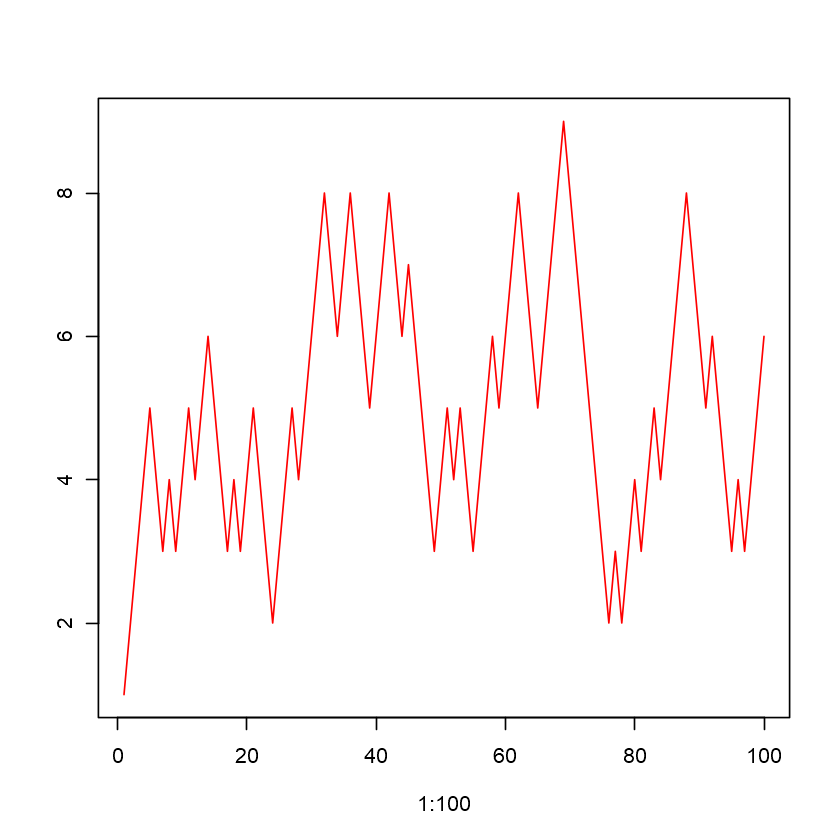

In [14]:
#
# Insert here your code
#
# Example, with Ehrenfest Markov chain
#
#~ P<-matrix(c(0,1/3,0,0,1,0,2/3,0,0,2/3,0,1,0,0,1/3,0).nrowm()
#~ plot(1:100,r.traj(100,c(1,0,0,0),P,"l",col="red",ylab="")
plot(1:100,r.traj(100,c(1,rep(0,10)),Ehrenfest.P(10)),"l",col="red",ylab="")

#### Exercise

Write a code to simulate a number $N$ of length $n$ trajectories of a Markov chain with initial probabilities vector $d$ and transition matrix $P$.

In [15]:
#
# Insert here your code
#

#### Exercise

Apply the code to simulate $N$ trajectories of a Markov chain to check experimentally that, indeed, after a long time the distribution of states in each of the examples above (Weather in Tel Aviv, in the Land of Oz, Ehrenfest model, drunkard's walk) approximates a stationary distribution.

In [15]:
#
# Insert here your code
#

#### Exercise

Apply the code to simulate $N$ trajectories of a Markov chain to estimate the number of steps the drunkard needs to reach one of the extreme pubs.

In [16]:
#
# Insert here your code
#

#### Exercise

Apply the code to simulate $N$ trajectories of a Markov chain to estimate the time needed _(mixing time)_ to obtain a sufficiently good approximation to the limit distribution.

In [17]:
#
# Insert here your code
#

## Reversible Markov chains

In [18]:
P<-matrix(c(0,0.5,0,1,0,1/3,0,1/2,2/3),nrow=3)
round(P,3)

0.0,1.000,0.000
0.5,0.000,0.500
0.0,0.333,0.667


In [19]:
limit.pmf<-function(P){
    epsilon<-1.0e-10
    eP<-eigen(P)
    U<-eP$vectors
    d<-eP$values
    j<-which(abs(d-1)<epsilon)  	# Find eigenvalue == 1
    U1<-solve(U)                	# Inverse matrix
    v<-U1[j,]
    p.inf<-v/sum(v)
    return(p.inf)
    }
p<-limit.pmf(P)
round(p,3)

[1] 0.167 0.333 0.500

Check that this chain is reversible with respect to $p$

In [20]:
P.tilde<-diag(1/p)%*%t(P)%*%diag(p)
round(P.tilde,3)

0.0,1.000,0.000
0.5,0.000,0.500
0.0,0.333,0.667
